In [13]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("SeoulBikeData.csv")
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [4]:
#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [5]:
# Can break the date into date, month, year columns and convert them into integers (from strings) for the purpose of correlation map

days = [int((df['Date'].iloc[i])[0:2]) for i in range(len(df))]
month = [int((df['Date'].iloc[i])[3:5]) for i in range(len(df))]
year = [int((df['Date'].iloc[i])[6:]) for i in range(len(df))]
df['Day'], df['Month'], df['Year'] = days, month, year

In [6]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


   Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   

   Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0              2000                     -17.6                      0.0   
1              2000                     -17.6                      0.0   
2              2000                     -17.7                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  Day  Month  \
0           0.0            0.0        0        0                0    1     12   
1           0.0            0.0        0        0                0    1     12   
2           0.0            0.0        0        0                0    1     12   

   Year  
0  2017  
1  2017  
2  2017  


<Axes: >

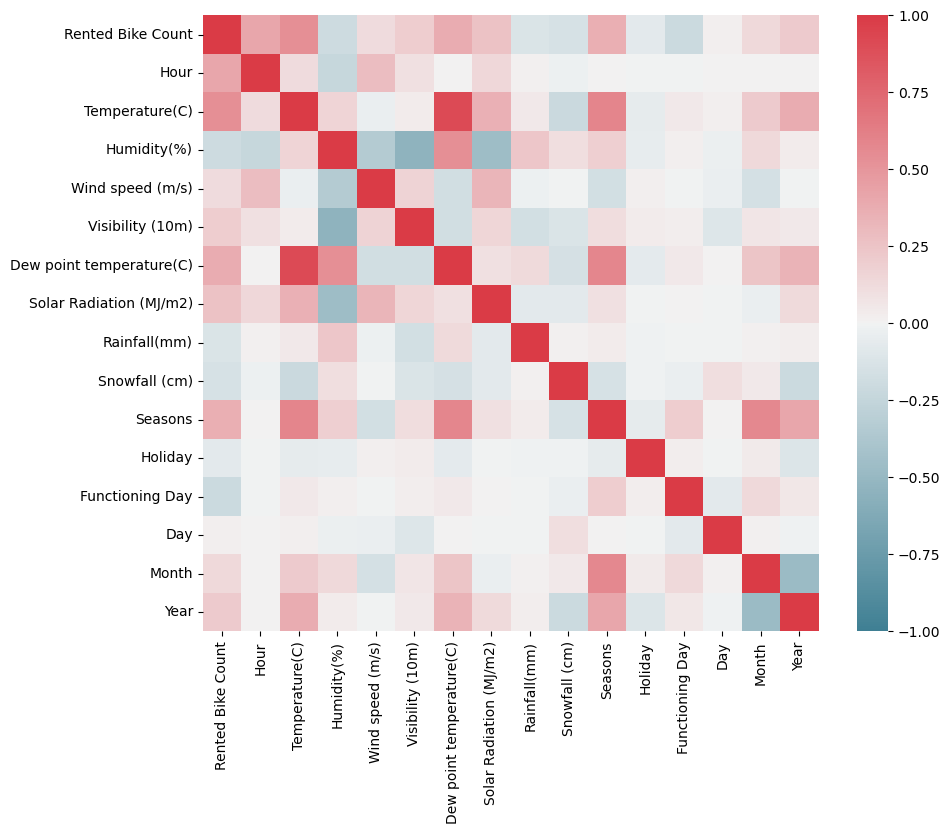

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = df.drop(columns = ['Date'])
# map unique season to numbers, map holiday to binary, and functioning day to binary
seasons = {}
for idx, i in enumerate(df['Seasons'].drop_duplicates()):
    seasons[i] = idx
holiday = {"No Holiday": 0, "Holiday": 1}
functioning = {"Yes": 0, "No": 1}
df1.Holiday = [holiday[item] for item in df.Holiday]
df1.Seasons = [seasons[item] for item in df.Seasons]
df1['Functioning Day'] = [functioning[item] for item in df1['Functioning Day'] ]

print(df1.head(3))


f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

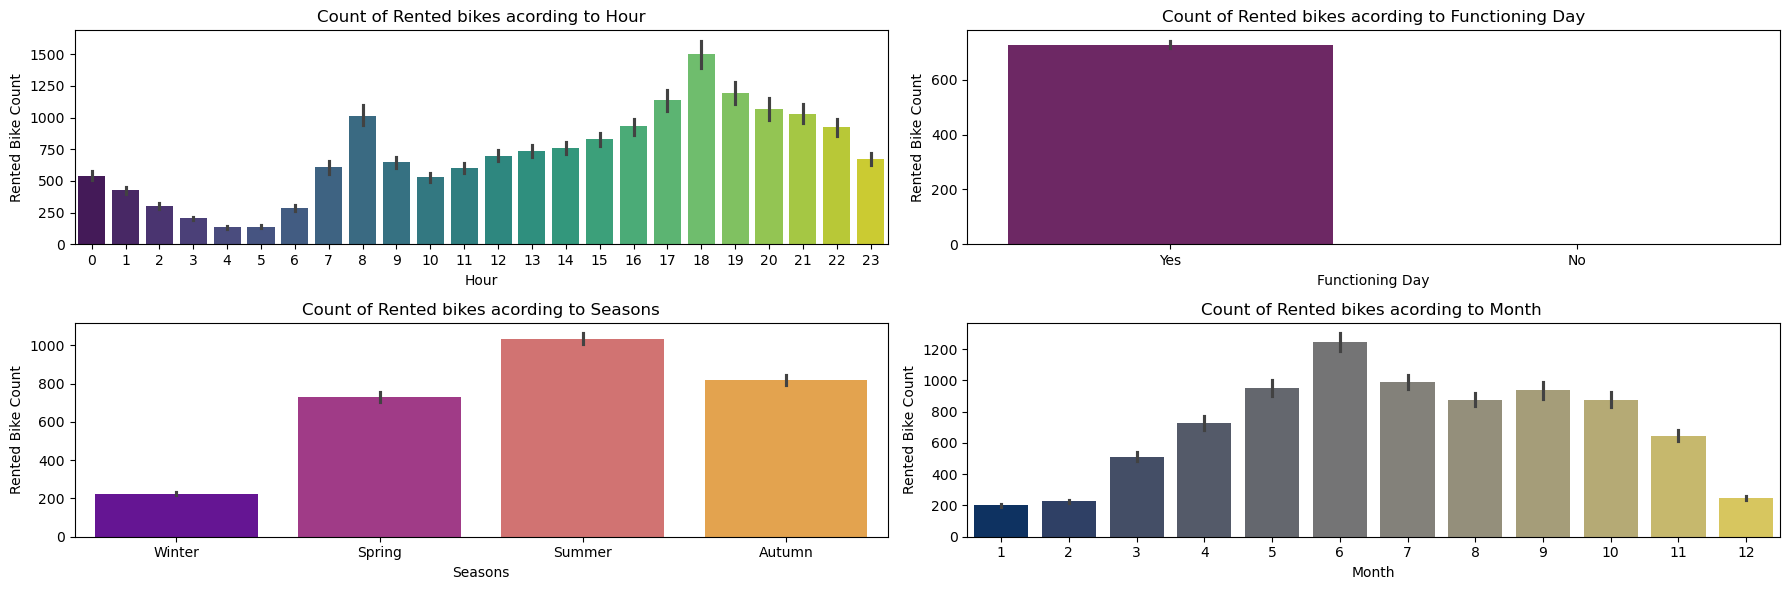

In [19]:
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(2, 2, figsize=(18, 6));
# hour vs bike count
sns.barplot(data=df1,x='Hour',y='Rented Bike Count',ax=ax[0][0], palette='viridis');
ax[0][0].set(title='Count of Rented bikes acording to Hour');

# Functioning vs bike count
sns.barplot(data=df1,x='Functioning Day',y='Rented Bike Count',ax=ax[0][1], palette='inferno');
ax[0][1].set(title='Count of Rented bikes acording to Functioning Day');
ax[0][1].set_xticklabels(['Yes', 'No'])

# season vs bike count
sns.barplot(data=df1,x='Seasons', y='Rented Bike Count',ax=ax[1][0], palette='plasma');
ax[1][0].set(title='Count of Rented bikes acording to Seasons');
ax[1][0].set_xticklabels(['Winter', 'Spring', 'Summer', 'Autumn'])

# month vs bike count
sns.barplot(data=df1,x='Month',y='Rented Bike Count',ax=ax[1][1], palette='cividis');
ax[1][1].set(title='Count of Rented bikes acording to Month ');

plt.show()



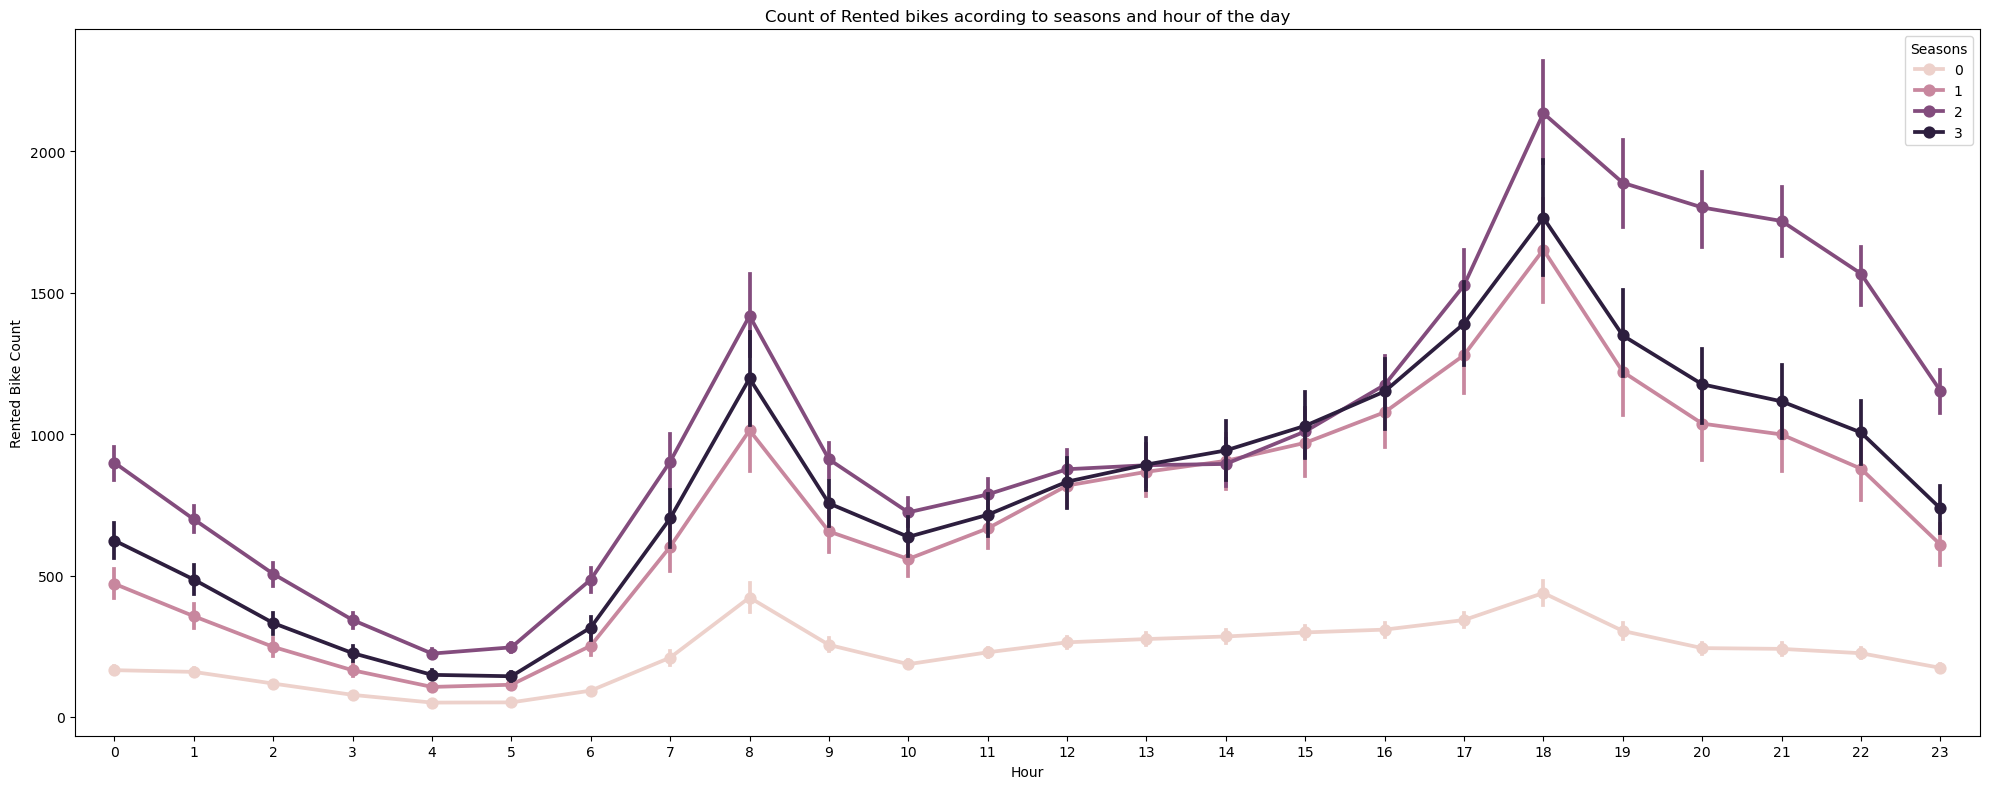

In [20]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax);
ax.set(title='Count of Rented bikes acording to seasons and hour of the day');

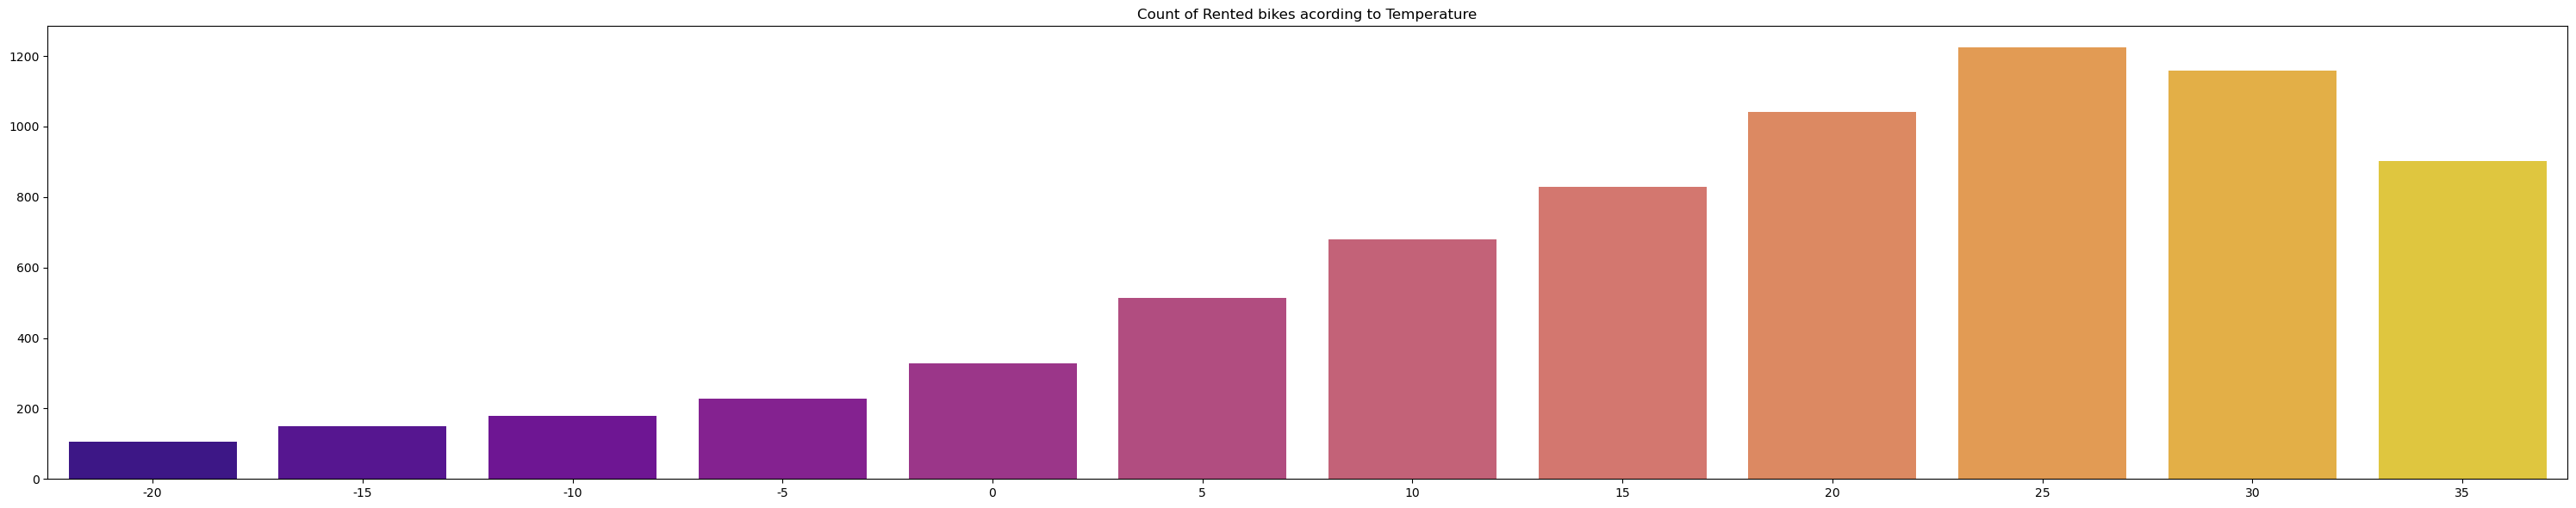

In [18]:

fig, ax = plt.subplots(figsize=(30, 6));
# temperature vs bike count
# Convert temperature in groups of 5C and average the rented bike counts for that range (rounding to 5s)
temp_min, temp_max = round(min(df1['Temperature(C)'])/5)*5, round(max(df1['Temperature(C)'])/5)*5
dict_temp = {}
for i in range(temp_min, temp_max, 5):
    # Filter rows based on the temperature interval
    filtered_df = df1[(df1['Temperature(C)'] >= i) & (df1['Temperature(C)'] < i+5)]
    dict_temp[i] = filtered_df['Rented Bike Count'].mean()
# print(dict_temp)
# print(temp_max, temp_min)
sns.barplot(data=dict_temp,ax=ax, palette='plasma');
ax.set(title='Count of Rented bikes acording to Temperature');

# plt.show()

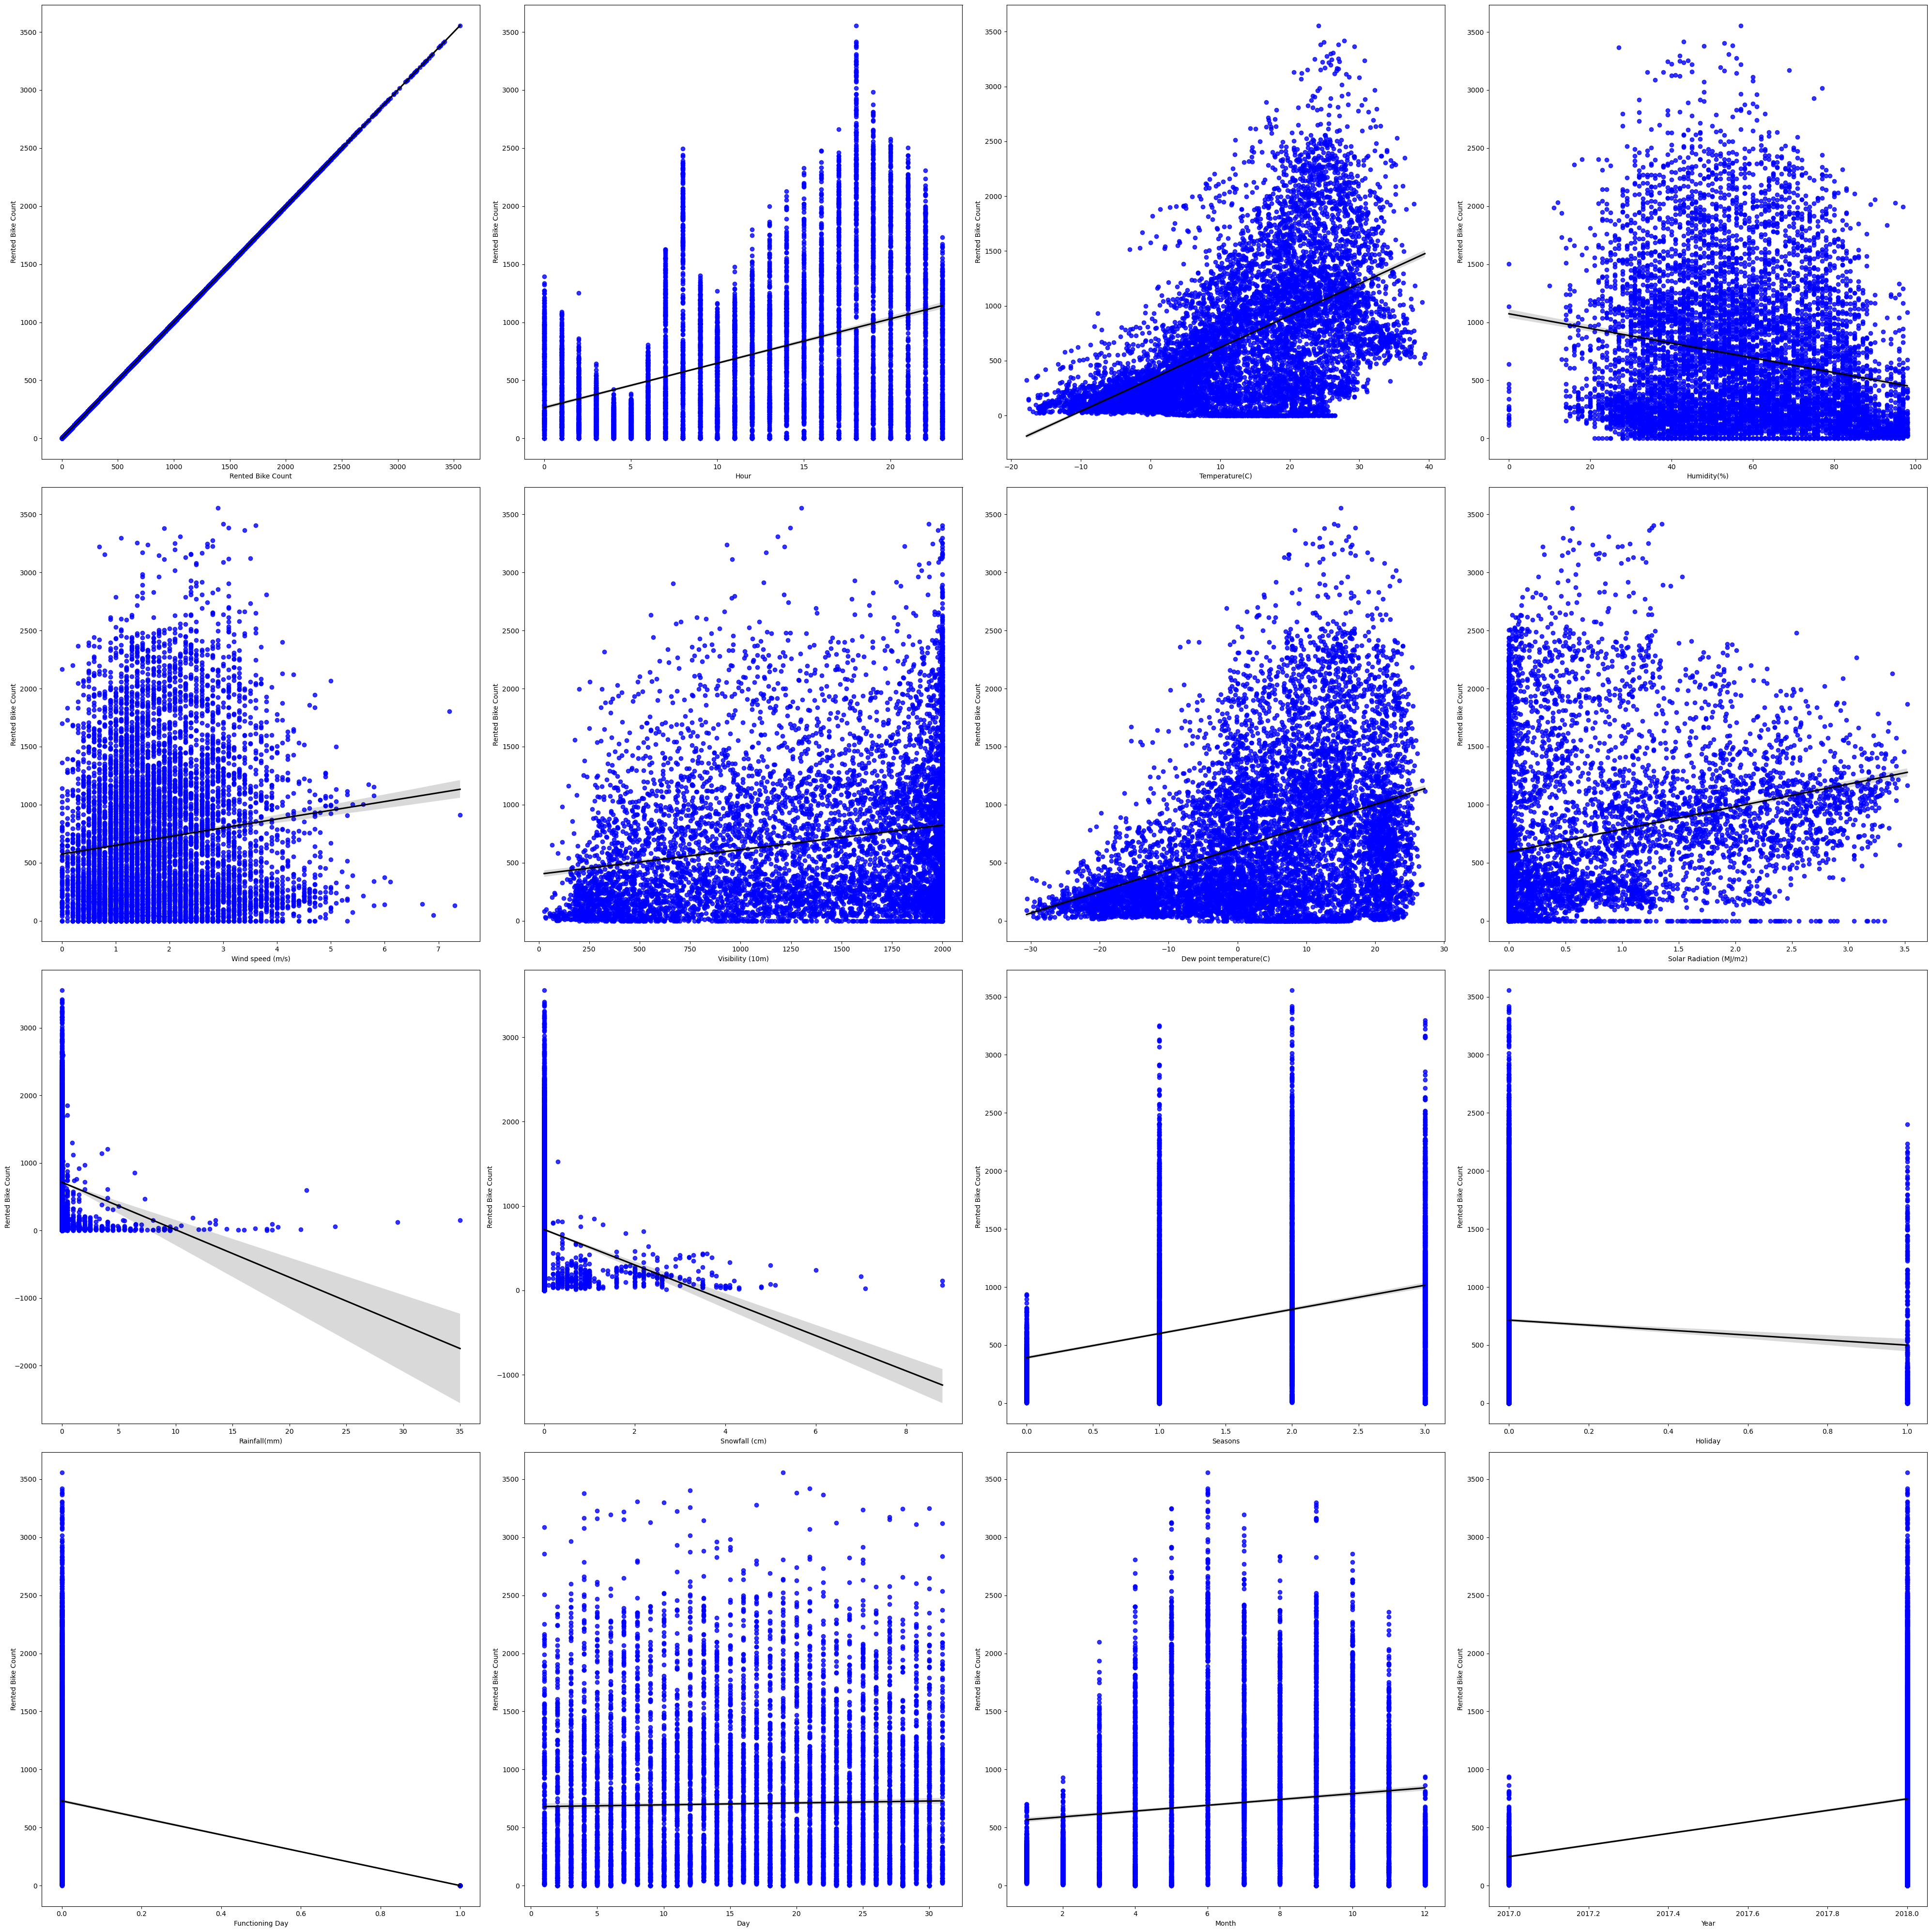

In [29]:
# printing the regression plot for all the numerical features
fig,ax=plt.subplots(4, 4, figsize=(40,40)) # since we know there are 16 features
for idx, col in enumerate(df1.columns):
  sns.regplot(x=df1[col],y=df1['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"}, ax=ax[idx//4][idx%4])

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y = df1['Rented Bike Count']
X = (df1.drop(columns = ['Rented Bike Count'])).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)



mse = mean_squared_error(y_test.values, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, y_pred_lr)
r2 = r2_score(y_test.values, y_pred_lr)
evs = explained_variance_score(y_test.values, y_pred_lr)

LR_scores = [mse, rmse, mae, r2, evs]



In [107]:
from sklearn.svm import SVR
reg = SVR()


reg.fit(X_train, y_train)

y_pred_svr = reg.predict(X_test)


mse = mean_squared_error(y_test.values, y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, y_pred_svr)
r2 = r2_score(y_test.values, y_pred_svr)
evs = explained_variance_score(y_test.values, y_pred_svr)

SVR_scores = [mse, rmse, mae, r2, evs]


In [108]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

y_pred_gb = reg.predict(X_test)


mse = mean_squared_error(y_test.values, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, y_pred_gb)
r2 = r2_score(y_test.values, y_pred_gb)
evs = explained_variance_score(y_test.values, y_pred_gb)

GBR_scores = [mse, rmse, mae, r2, evs]

In [109]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_pred_rf = reg.predict(X_test)


# Assuming y_true and y_pred_rf are your true and predicted values
mse = mean_squared_error(y_test.values, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, y_pred_rf)
r2 = r2_score(y_test.values, y_pred_rf)
evs = explained_variance_score(y_test.values, y_pred_rf)

RFR_scores = [mse, rmse, mae, r2, evs]

In [110]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

y_pred_dt = reg.predict(X_test)


# Assuming y_true and y_pred_dt are your true and predicted values
mse = mean_squared_error(y_test.values, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, y_pred_dt)
r2 = r2_score(y_test.values, y_pred_dt)
evs = explained_variance_score(y_test.values, y_pred_dt)

DTR_scores = [mse, rmse, mae, r2, evs]

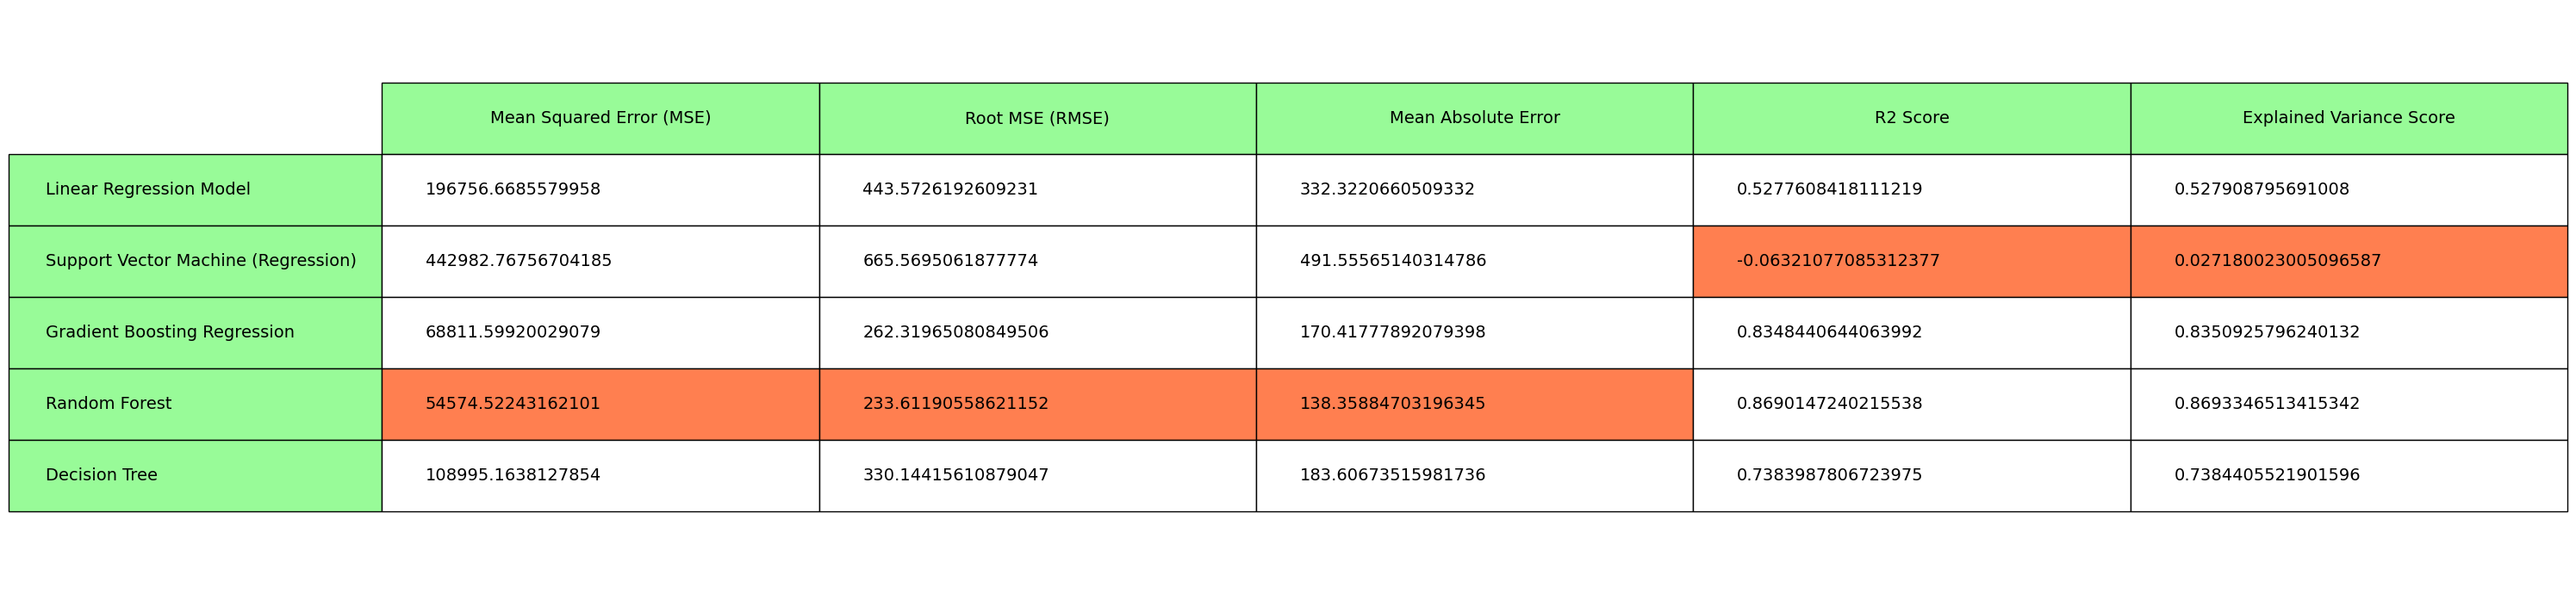

In [111]:
plt.rcParams["figure.figsize"] = [30, 7]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
model_names = ['Linear Regression Model', 'Support Vector Machine (Regression)', 'Gradient Boosting Regression', 'Random Forest', 'Decision Tree']
evaluation_metrics = ['Mean Squared Error (MSE)', 'Root MSE (RMSE)', 'Mean Absolute Error', 'R2 Score', 'Explained Variance Score']
axs.axis('tight')
axs.axis('off')
matrix = [LR_scores, SVR_scores, GBR_scores, RFR_scores, DTR_scores]
table = axs.table(cellText=matrix,
                      cellLoc = 'left',
                      rowLabels = model_names,
                      rowColours= ["palegreen"] * 10,
                      colLabels=evaluation_metrics,
                      colColours= ["palegreen"] * 10,
                      loc='center')

# Highlight cells with minimum value in each column
for col_idx, metric in enumerate(evaluation_metrics):
    col_values = [row[col_idx] for row in matrix]
    min_value_idx = col_values.index(min(col_values))

    # Highlight the cell with minimum value in coral color
    table[min_value_idx + 1, col_idx].set_facecolor("coral")
        
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 4)
fig.tight_layout()
plt.show()

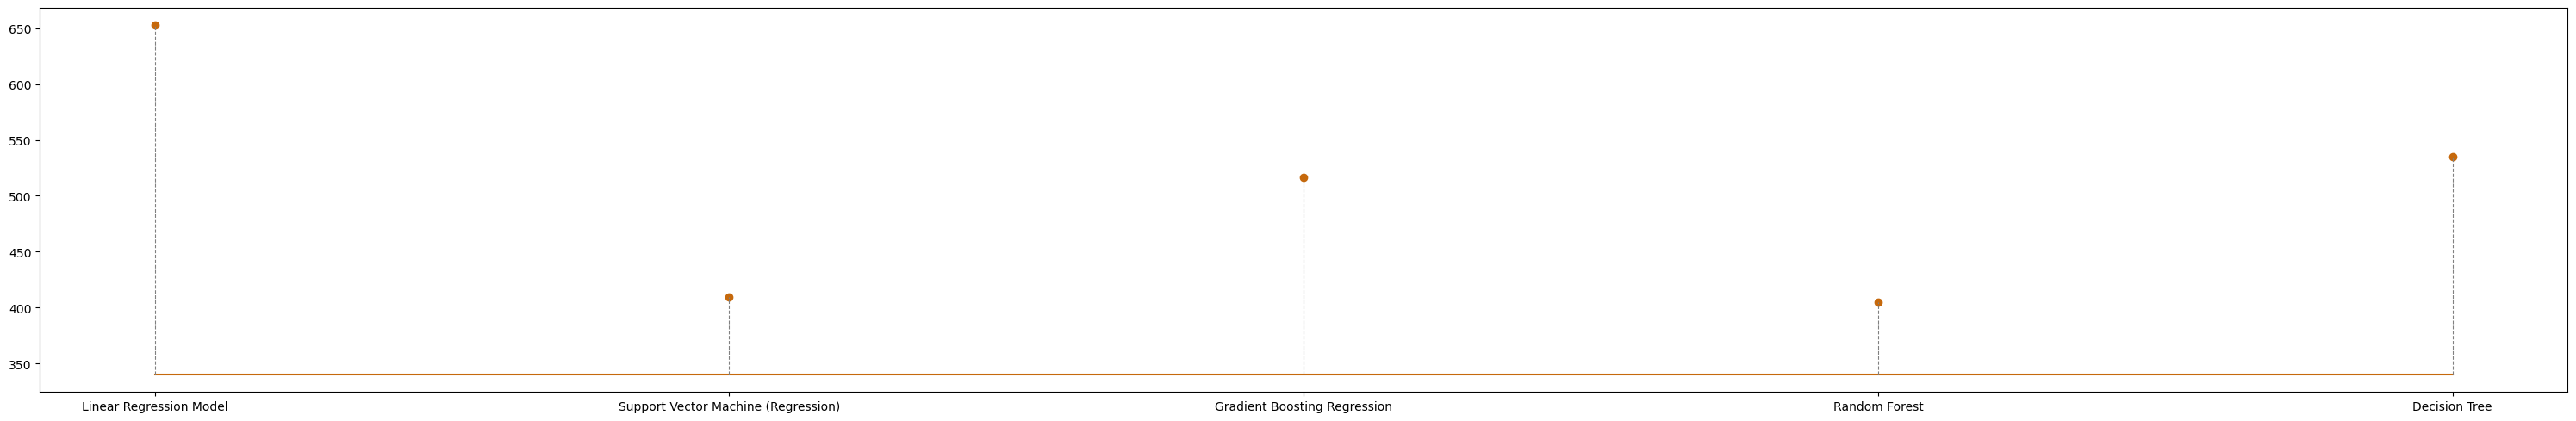

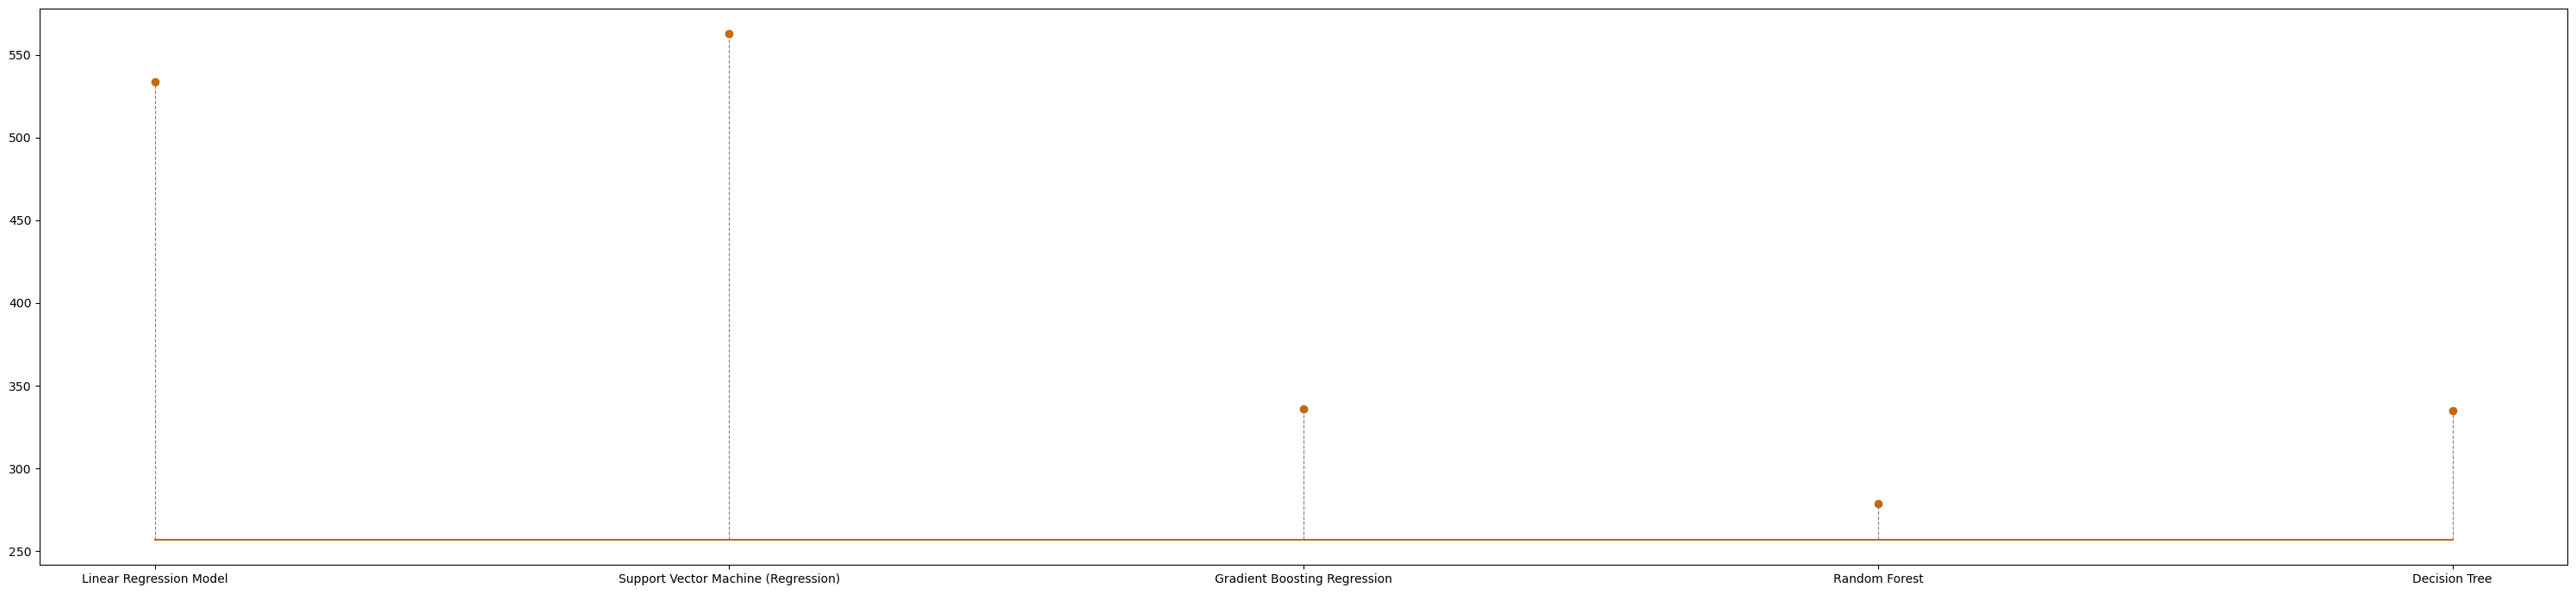

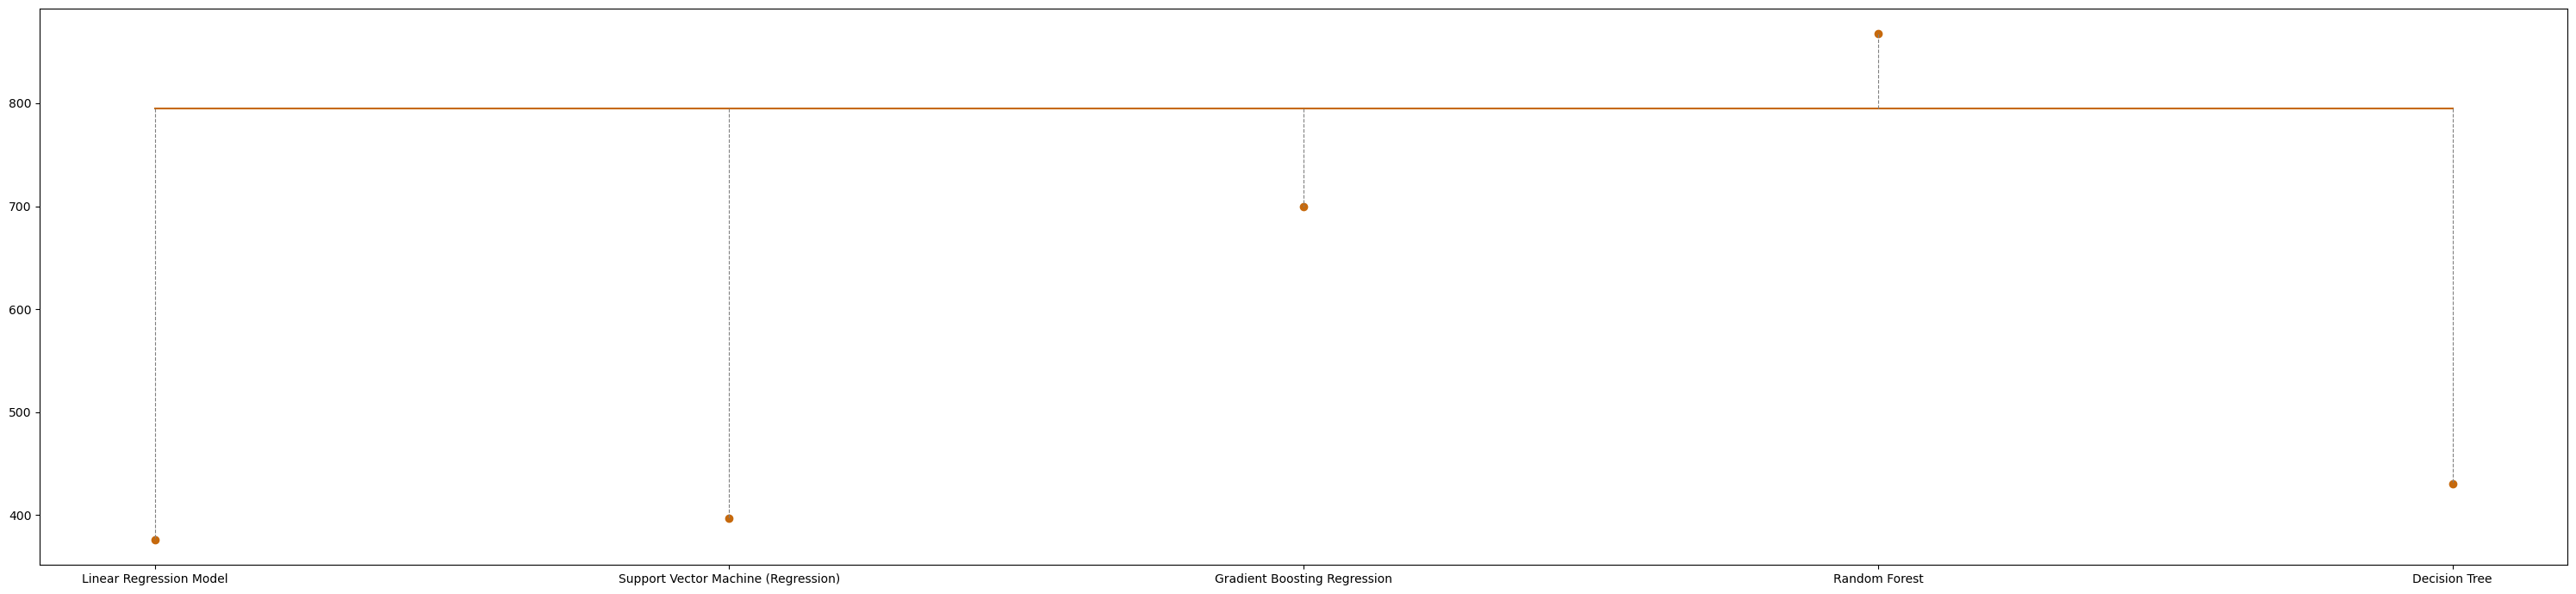

In [146]:
# printing how far the predicted value is to the actual value for a random row in X
import random
fig, ax = plt.subplots(figsize=(30, 5));

length = len(model_names)
y_preds = [y_pred_lr, y_pred_svr, y_pred_gb, y_pred_rf, y_pred_dt]

for i in range(3):
    idx = random.randint(0,len(y_test)-1)
    plt.plot(range(length), [(y_test.values)[idx]]*length, label='True Value');
    plt.scatter(range(length), [y_preds[q][idx] for q in range(length)], label='Predicted Values');
    for j in range(length):
        plt.plot([j, j], [(y_test.values)[idx], y_preds[j][idx]], color='gray', linestyle='--', linewidth=0.8)
    plt.xticks(range(length), model_names)
    plt.tight_layout()
    plt.show()

